## Analysing four decades of movie data
Purpose: to determine if there is any correlation between the 
gross revenue and other variables in the dataset

In [2]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as datetime
from dateutil.parser import parse

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Setting a default figure size for our plot

In [3]:
#Import the dataset
raw_movie_data = pd.read_csv("movies.csv")

type(raw_movie_data) #confirm data is infact a df

pandas.core.frame.DataFrame

In [89]:
raw_movie_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
#copy of original data set which will be our working file
df = raw_movie_data.copy()

In [6]:
df.equals(raw_movie_data) #confirm df's are the same

True

In [7]:
pd.options.display.max_rows = None
df.head(50) #examine data

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


# Cleaning Data

In [41]:
df.head()

,film_name,rating,genre,year,released,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [9]:
df.info() #a quick and concise method to determine the
          #shape, null count and Dtypes for the dataset
    
df.isnull().sum() #exact count of null values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [10]:
df.shape

(7668, 15)

In [11]:
#Another option of determining the amount of null values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print(f"{col} - {(100 * pct_missing).round()}%")

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


## Initial observations
There are 7668 total entries and 15 columns
<br>The following columns are qualatative (numerical) variables: score, votes, budget, gross, runtime
<br>The following are categorical values: name, rating, genre, year, released, director, writer, star, country, company

Some columns have Null values, most notable budget and gross.
<br>Since we are looking for correlations between gross and other variables in the dataset we can drop all rows with gross values = Null
<br>At this point we'll keep all other rows


### Change column names

In [12]:
# Assigning more meaningful names to the respective columns
df.columns.values

array(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross',
       'company', 'runtime'], dtype=object)

In [13]:
df.rename(columns = {'name': 'film_name', 'star': 'main_actor', 'country': 'country_produced', 'company': 'production_company'}, inplace = True)

In [42]:
df.head()

,film_name,rating,genre,year,released,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Dropping all rows with gross = isNull
Since we are analysing correlations between gross and other variables there is no point in keeping rows with missing gross values

In [43]:
df.dropna(subset = ["gross"], how = "all", inplace = True)

In [16]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7479 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   film_name           7479 non-null   object 
 1   rating              7425 non-null   object 
 2   genre               7479 non-null   object 
 3   year                7479 non-null   int64  
 4   released            7479 non-null   object 
 5   score               7479 non-null   float64
 6   votes               7479 non-null   float64
 7   director            7479 non-null   object 
 8   writer              7476 non-null   object 
 9   main_actor          7479 non-null   object 
 10  country_produced    7478 non-null   object 
 11  budget              5436 non-null   float64
 12  gross               7479 non-null   float64
 13  production_company  7469 non-null   object 
 14  runtime             7478 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 934.9+

film_name                0
rating                  54
genre                    0
year                     0
released                 0
score                    0
votes                    0
director                 0
writer                   3
main_actor               0
country_produced         1
budget                2043
gross                    0
production_company      10
runtime                  1
dtype: int64

In [17]:
df.shape

(7479, 15)

In [18]:
df.head(20)

,film_name,rating,genre,year,released,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


## Analysing data per column

### file_name

film_name has no missing values so we can move on

### rating

In [19]:
df["rating"].info()
df["rating"].isnull().sum()
df["rating"].unique()

<class 'pandas.core.series.Series'>
Int64Index: 7479 entries, 0 to 7659
Series name: rating
Non-Null Count  Dtype 
--------------  ----- 
7425 non-null   object
dtypes: object(1)
memory usage: 116.9+ KB


array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'PG-13',
       'Unrated', 'X', 'TV-PG', 'TV-MA', 'TV-14'], dtype=object)

In [20]:
df["rating"].value_counts()

R            3613
PG-13        2091
PG           1222
Not Rated     259
G             152
Unrated        47
NC-17          23
TV-MA           9
TV-PG           4
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

We can simplify the ratings as follows:

PG-13(parental guidance advised for children under 13) and PG(parental guidance suggested for children 10 and under) 
<br>are very similar and can therefore be grouped together.

R and the two PG's makeup most of the entries.

In this case, Not rated = Unrated = NaN, none of which will factor in our correlation.

Everything else can be grouped as other.

To optimise:

R -> R
<br>Pg-13 & PG -> PG
<br>Everything else -> Other
<br>Not Rated, unrated & NaN -> Not Rated

In [44]:
df_rating = df["rating"] #make a series copy of the column

In [45]:
type(df_rating)

pandas.core.series.Series

In [46]:
#raplace string values with categorical numerical values
df_rating = df_rating.replace('PG-13', 'PG')

#As above but making use of lists to expedite the process
rating_other_old = ['G', 'NC-17', 'TV-MA', 'TV-PG', 'X', 'Approved', 'TV-14']
rating_other_new = ['Other', 'Other', 'Other', 'Other', 'Other', 'Other', 'Other']
df_rating = df_rating.replace(rating_other_old, rating_other_new)

df_rating = df_rating.replace('Unrated', 'Not Rated')

df_rating = df_rating.fillna('Not Rated')

In [91]:
df_rating.head(20)

0      R
1      R
2     PG
3     PG
4      R
5      R
6      R
7      R
8     PG
9      R
10    PG
11    PG
12    PG
13     R
14     R
15    PG
16     R
17    PG
18     R
19     R
Name: rating, dtype: object

In [25]:
df_rating.value_counts()

R            3613
PG           3313
Not Rated     360
Other         193
Name: rating, dtype: int64

In [47]:
#As above but making use of lists to expedite the process
rating_other_old = ['G', 'NC-17', 'TV-MA', 'TV-PG', 'X', 'Approved', 'TV-14']
rating_other_new = [3, 3, 3, 3, 3, 3, 3]
df_rating = df_rating.replace(rating_other_old, rating_other_new)

In [27]:
df_rating.value_counts()

R            3613
PG           3313
Not Rated     360
Other         193
Name: rating, dtype: int64

In [48]:
type(df_rating[0])

str

Assign series of new values to the "ratings" colum
<br>First call the unique value count method on both

In [29]:
df["rating"].value_counts()

R            3613
PG-13        2091
PG           1222
Not Rated     259
G             152
Unrated        47
NC-17          23
TV-MA           9
TV-PG           4
X               3
Approved        1
TV-14           1
Name: rating, dtype: int64

In [30]:
df_rating.value_counts()

R            3613
PG           3313
Not Rated     360
Other         193
Name: rating, dtype: int64

In [49]:
df["rating"] = df_rating

In [32]:
df["rating"].value_counts()

R            3613
PG           3313
Not Rated     360
Other         193
Name: rating, dtype: int64

In [93]:
df.head() #inspect the df

,film_name,rating,genre,year,released,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### genre

This series can be left as is, since some of the movies with highest revenues are from the smaller genres...think Star Wars and Jurrasic Park = Sci-Fi

In [34]:
df["genre"].info()

<class 'pandas.core.series.Series'>
Int64Index: 7479 entries, 0 to 7659
Series name: genre
Non-Null Count  Dtype 
--------------  ----- 
7479 non-null   object
dtypes: object(1)
memory usage: 374.9+ KB


In [35]:
df["genre"].value_counts()

Comedy       2192
Action       1673
Drama        1468
Crime         542
Biography     433
Adventure     420
Animation     335
Horror        307
Fantasy        43
Mystery        20
Thriller       12
Family         11
Romance         8
Sci-Fi          8
Western         3
Musical         2
Music           1
Sport           1
Name: genre, dtype: int64

### year

In [36]:
df.head(50)

,film_name,rating,genre,year,released,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


Since the release year is also under the column released, the year colum is redundant and can be dropped.

### country_released

In [37]:
type(df["released"][0])

str

In [38]:
len(df["released"])

7479

In [39]:
country_released = []

for i in range(len(df["released"])):
    text = df["released"][i]
    country_released.append(text[text.index("(") + len("("):text.index(")")])

KeyError: 27

### Interesting KeyError occurs
This error implies that the key, in this case our index does not exist for this entry
<br>Because we removed all rows with no value in the "Gross" column, the indexes of those rows are missing
<br>Solution = reset the df index

## Check Point
At this point before we update the index it's a good idea to create a check point

In [50]:
df_date_released = df.copy()

In [ ]:
df_date_released.head()

### Reset index

In [94]:
df_date_released.reset_index(drop = True, inplace = True)
df_date_released.head()

,film_name,rating,genre,year,released,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States,"June, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States,"July, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States,"June, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States,"July, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States,"July, 1980"


In [ ]:
df_date_released.shape

In [ ]:
df.shape

## country_released...continued

In [52]:
# reattempting the for loop with reset index
country_released = []

for i in range(len(df_date_released["released"])):
    text = df_date_released["released"][i]
    country_released.append(text[text.index("(") + len("("):text.index(")")])

In [ ]:
country_released

In [ ]:
len(country_released)

In [53]:
df_date_released["country_released"] = country_released

In [ ]:
df_date_released["country_released"].value_counts()

In [ ]:
df_date_released["country_released"].info()

In [95]:
df_date_released.head()

,film_name,rating,genre,year,released,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,United States,"June, 1980"
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,United States,"July, 1980"
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,United States,"June, 1980"
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,United States,"July, 1980"
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,United States,"July, 1980"


### year_realeased & month_released
I consider both these variables important
<br>The year and month of film release can potantially have a significant correlation to the gross revenue generated
<br>Movies released in the summer might do better than those released during the winter...for example
<br>With respect to year, budgets could differ

First substring the *released* value to extract the month

In [ ]:
released_month = []
year_released = []

for i in range(len(df_date_released["released"])):
    text = df_date_released["released"][i]
    #Extract month from text and remove all white spaces before and after substring
    month = text[:text.index(" ")]
    #Append list with month value
    released_month.append(month.strip())
    
    print(text)
    #Extract year from text and remove all white spaces before and after substring
    year = text[text.index(", ") + len(", "):text.index(" (")]
    print(year)
    #Append list with year value
    year_released.append(year.strip())

### Error!
We ran into another error and upon further investigation:
<br>certain *released* entries do not have commas between the months and years.
<br>This renders our code to extract our year substring problematic
<br>Let's try a different substring identifier

In [ ]:
df_date_released.head()

In [54]:
year = df_date_released["released"][0]

In [55]:
year

'June 13, 1980 (United States)'

In [56]:
date_1 = parse(year, fuzzy = True)
date_1

datetime.datetime(1980, 6, 13, 0, 0)

In [ ]:
end_index = year.index("(")

In [ ]:
end_index

In [ ]:
sub_year = year[(end_index - 6):end_index]
sub_year.strip()

OK! This could be a possible solution, let's apply it to the df.

In [57]:
released_month = []
year_released = []
date_released = []

for i in range(len(df_date_released["released"])):
    text = df_date_released["released"][i]
    #Extract month from text and remove all white spaces before and after substring
    month = text[:text.index(" ")]
    #Append list with month value
    released_month.append(month.strip())

    #Extract year from text and remove all white spaces before and after substring
    end_index = text.index("(")
    year = text[(end_index - 6):end_index]
    #Append list with year value
    year_released.append(year.strip())
    
    date_str = month.strip() + ", " + year.strip()
    
    date_released.append(date_str)

In [58]:
df_date_released["date_released"] = date_released

In [ ]:
df_date_released.head()

In [96]:
df_date_released["date_released"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7479 entries, 0 to 7478
Series name: date_released
Non-Null Count  Dtype 
--------------  ----- 
7479 non-null   object
dtypes: object(1)
memory usage: 58.6+ KB


## Checkpoint

In [59]:
df_date_released_mod = df_date_released.copy()

In [60]:
df_date_released_mod['date_released'] = pd.to_datetime(df_date_released_mod['date_released']).dt.strftime('%d-%m-%Y')

In [97]:
df_date_released_mod['date_released'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7479 entries, 0 to 7478
Series name: date_released
Non-Null Count  Dtype 
--------------  ----- 
7479 non-null   object
dtypes: object(1)
memory usage: 58.6+ KB


In [98]:
df_date_released_mod.head()

,film_name,rating,genre,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146,United States,01-06-1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104,United States,01-07-1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124,United States,01-06-1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88,United States,01-07-1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98,United States,01-07-1980


That takes care of most of the work, what's left to do is:
<br>drop the zeros for the budget, gross and runtime columns as they provide no additional data

Now that we have extracted more useful fields from the released column we can drop that column

In [61]:
df_date_released_mod.drop("released", axis = 1, inplace = True)

In [ ]:
df_date_released_mod.head()

In [99]:
df_date_released_mod["budget"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7479 entries, 0 to 7478
Series name: budget
Non-Null Count  Dtype  
--------------  -----  
5436 non-null   float64
dtypes: float64(1)
memory usage: 58.6 KB


In [100]:
df_date_released_mod["gross"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7479 entries, 0 to 7478
Series name: gross
Non-Null Count  Dtype
--------------  -----
7479 non-null   int64
dtypes: int64(1)
memory usage: 58.6 KB


In [62]:
df_date_released_mod["gross"] = df_date_released_mod["gross"].astype("int64")

In [101]:
df_date_released_mod["runtime"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7479 entries, 0 to 7478
Series name: runtime
Non-Null Count  Dtype
--------------  -----
7479 non-null   int64
dtypes: int64(1)
memory usage: 58.6 KB


In [63]:
df_date_released_mod["runtime"] = df_date_released_mod["runtime"].astype("int64")

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [64]:
df_date_released_mod[df_date_released_mod["runtime"].isnull()]

,film_name,rating,genre,year,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
6021,One for the Money,PG,Action,2012,5.3,41000.0,Julie Anne Robinson,Stacy Sherman,Katherine Heigl,United States,40000000.0,38084162,Lakeshore Entertainment,NaN,United States,01-01-2012


In [65]:
df_date_released_mod["runtime"][6021] = 90

<ipython-input-65-156c4a695677>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_date_released_mod["runtime"][6021] = 90


In [102]:
df_date_released_mod["runtime"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7479 entries, 0 to 7478
Series name: runtime
Non-Null Count  Dtype
--------------  -----
7479 non-null   int64
dtypes: int64(1)
memory usage: 58.6 KB


In [66]:
df_date_released_mod["runtime"] = df_date_released_mod["runtime"].astype("int64")

In [ ]:
df_date_released_mod.head()

In [103]:
df_date_released_mod["votes"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7479 entries, 0 to 7478
Series name: votes
Non-Null Count  Dtype
--------------  -----
7479 non-null   int64
dtypes: int64(1)
memory usage: 58.6 KB


In [67]:
df_date_released_mod["votes"] = df_date_released_mod["votes"].astype("int64")

In [ ]:
df_date_released_mod.head()

In [68]:
#drop year column
df_date_released_mod.drop("year", axis = 1, inplace = True)
df_date_released_mod.head()

,film_name,rating,genre,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146,United States,01-06-1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104,United States,01-07-1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124,United States,01-06-1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88,United States,01-07-1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98,United States,01-07-1980


### rearrange columns

In [ ]:
df_date_released_mod.columns.values

In [69]:
new_col_order = ['film_name', 'rating', 'genre', 'date_released', 'score', 'votes', 
                 'director', 'runtime', 'writer', 'main_actor', 'country_produced',
                 'country_released', 'budget', 'gross', 'production_company']

In [ ]:
df_date_released_mod = df_date_released_mod[new_col_order]

In [104]:
df_date_released_mod.head()

,film_name,rating,genre,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146,United States,01-06-1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104,United States,01-07-1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124,United States,01-06-1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88,United States,01-07-1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98,United States,01-07-1980


In [70]:
df_clean = df_date_released_mod.copy()
df_clean.shape

(7479, 15)

## Correlation

### Initial assumptions

Expect budget to have a high correlation with gross income
<br>Also, production_company could have a significant correlation

In [71]:
df_clean["budget"].max()

356000000.0

In [72]:
df_clean["gross"].max()

2847246203

In [73]:
df_clean.loc[df_clean["gross"] == 2847246203, "film_name"].item()

'Avatar'

<function matplotlib.pyplot.show(close=None, block=None)>

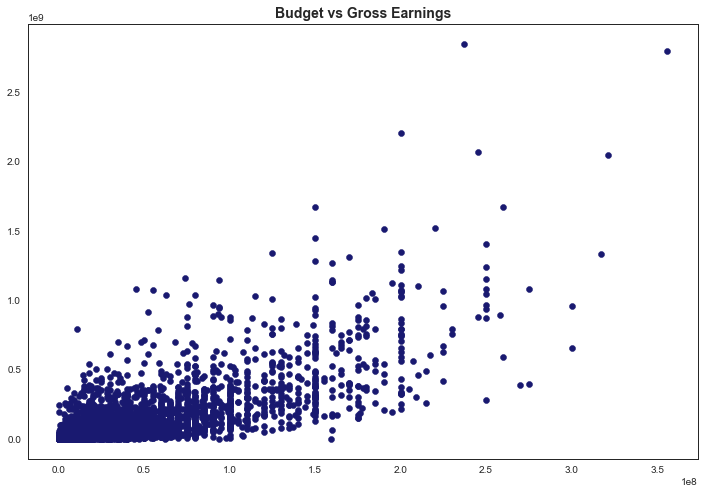

In [74]:
# Scatter plot with budget vs gross

sns.set_style("white")
plt.scatter(df_clean["budget"], 
            df_clean["gross"],
            color = "midnightblue")

plt.title("Budget vs Gross Earnings",
          fontsize = 14,
          weight = "bold")



plt.show

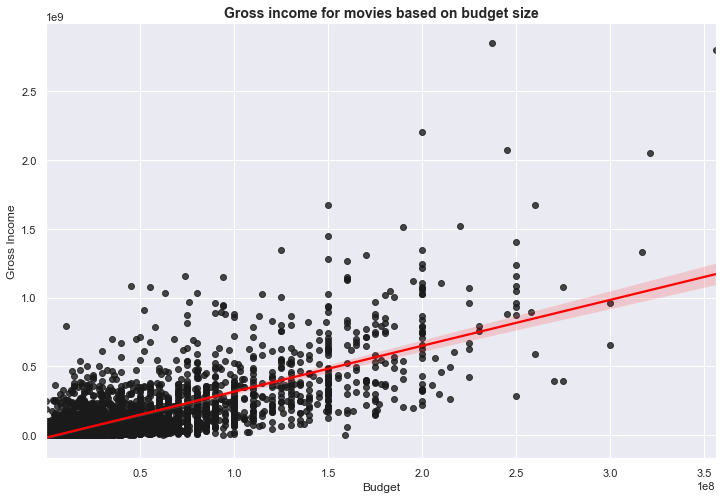

In [75]:
sns.set(rc = {'figure.figsize': (12,8)})
sns.regplot(x = "budget", 
            y = "gross", 
            data = df_clean, 
            scatter_kws = {'color': 'k'}, 
            line_kws = {'color': 'red'})
plt.xlabel("Budget")
plt.ylabel("Gross Income")
plt.title("Gross income for movies based on budget size", fontsize = 14, weight = "bold")
plt.show()

In [76]:
df_clean.corr(method = 'pearson') #pearson, kendall, spearman correlation methods

,score,votes,budget,gross,runtime
score,1.000000,0.413096,0.071792,0.186258,0.397407
votes,0.413096,1.000000,0.440021,0.630757,0.309554
budget,0.071792,0.440021,1.000000,0.740395,0.318547
gross,0.186258,0.630757,0.740395,1.000000,0.245231
runtime,0.397407,0.309554,0.318547,0.245231,1.000000


In [ ]:
df_clean.corr(method = 'kendall')

In [ ]:
df_clean.corr(method = 'spearman')

In [ ]:
#We'll stick with the default: pearson
#Initial assumption that there is a high correlation between budget and gross seems very positive

In [ ]:
#Let's create a more visual version of the correlation matrix

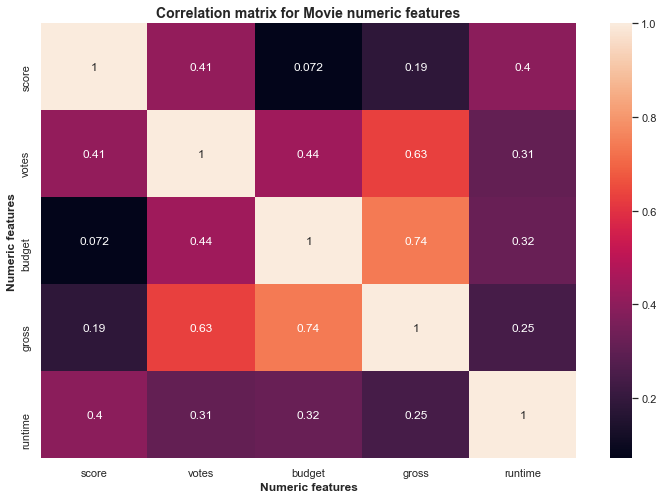

In [77]:
corr_matrix = df_clean.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrix for Movie numeric features", fontsize = 14, weight = "bold")
plt.xlabel("Numeric features", weight = "bold")
plt.ylabel("Numeric features", weight = "bold")

plt.show()

## Non-numeric variables

In [105]:
df_clean.head()

,film_name,rating,genre,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146,United States,01-06-1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104,United States,01-07-1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124,United States,01-06-1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88,United States,01-07-1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98,United States,01-07-1980


In [78]:
#create a copy od the clean df
df_numerised = df_clean.copy()
df_numerised.head()

,film_name,rating,genre,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,The Shining,R,Drama,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146,United States,01-06-1980
1,The Blue Lagoon,R,Adventure,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104,United States,01-07-1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124,United States,01-06-1980
3,Airplane!,PG,Comedy,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88,United States,01-07-1980
4,Caddyshack,R,Comedy,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98,United States,01-07-1980


In [79]:
#use a for loop to turn all non-numeric columns into cagtegorical types
for col_name in df_numerised.columns:
    if(df_numerised[col_name].dtype == "object"):
        df_numerised[col_name] = df_numerised[col_name].astype("category")
        df_numerised[col_name] = df_numerised[col_name].cat.codes
        
df_numerised.head()

,film_name,rating,genre,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,6428,3,6,8.4,927000,2500,3890,994,52,19000000.0,46998772,2213,146,54,205
1,5426,3,1,5.8,65000,2189,1578,313,53,4500000.0,58853106,701,104,54,246
2,5006,2,0,8.7,1200000,1072,2485,1666,53,18000000.0,538375067,1470,124,54,205
3,280,2,4,7.7,221000,1260,1936,2146,53,3500000.0,83453539,1728,88,54,246
4,1001,3,4,7.3,108000,1019,507,394,53,6000000.0,39846344,1695,98,54,246


In [80]:
df_numerised.head(20)

,film_name,rating,genre,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
0,6428,3,6,8.4,927000,2500,3890,994,52,19000000.0,46998772,2213,146,54,205
1,5426,3,1,5.8,65000,2189,1578,313,53,4500000.0,58853106,701,104,54,246
2,5006,2,0,8.7,1200000,1072,2485,1666,53,18000000.0,538375067,1470,124,54,205
3,280,2,4,7.7,221000,1260,1936,2146,53,3500000.0,83453539,1728,88,54,246
4,1001,3,4,7.3,108000,1019,507,394,53,6000000.0,39846344,1695,98,54,246
5,2050,3,9,6.4,123000,2441,4227,230,53,550000.0,39754601,1728,95,54,164
6,5427,3,0,7.9,188000,1370,808,1218,53,27000000.0,115229890,2175,133,54,205
7,4317,3,3,8.2,330000,1769,1710,2140,53,18000000.0,23402427,604,129,54,449
8,5143,2,0,6.8,101000,2226,1915,832,53,54000000.0,108185706,846,127,54,206
9,6059,3,3,7.0,10000,2767,410,565,53,10000000.0,15795189,2167,100,54,164


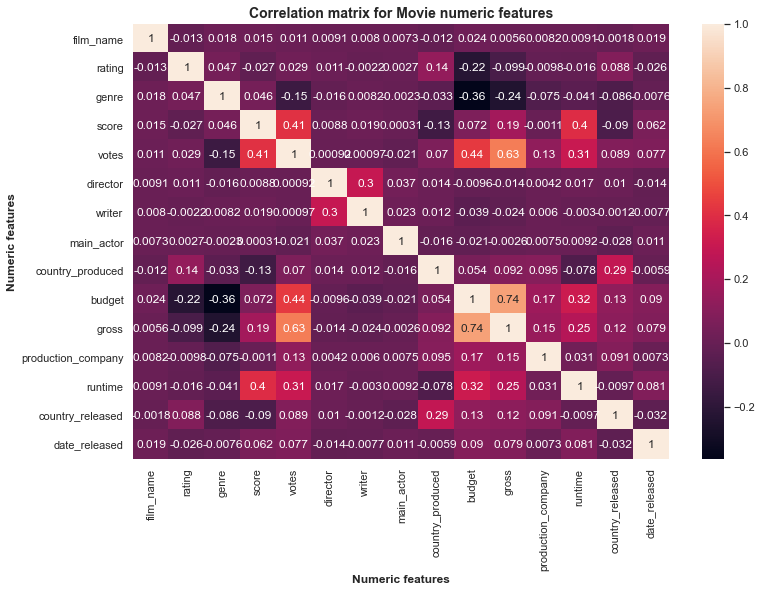

In [81]:
corr_matrix = df_numerised.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)

plt.title("Correlation matrix for Movie numeric features", fontsize = 14, weight = "bold")
plt.xlabel("Numeric features", weight = "bold")
plt.ylabel("Numeric features", weight = "bold")

plt.show()

In [83]:
df_numerised.corr()

,film_name,rating,genre,score,votes,director,writer,main_actor,country_produced,budget,gross,production_company,runtime,country_released,date_released
film_name,1.000000,-0.013348,0.017885,0.015473,0.011429,0.009092,0.008008,0.007278,-0.012027,0.023630,0.005557,0.008155,0.009124,-0.001774,0.018722
rating,-0.013348,1.000000,0.046523,-0.027349,0.029169,0.010576,-0.002218,0.002714,0.138126,-0.219580,-0.099277,-0.009793,-0.015871,0.087889,-0.025654
genre,0.017885,0.046523,1.000000,0.046093,-0.149289,-0.016412,0.008231,-0.002322,-0.033283,-0.363257,-0.243059,-0.074570,-0.040844,-0.086243,-0.007620
score,0.015473,-0.027349,0.046093,1.000000,0.413096,0.008810,0.018648,0.000310,-0.129474,0.071792,0.186258,-0.001107,0.397407,-0.090318,0.062429
votes,0.011429,0.029169,-0.149289,0.413096,1.000000,0.000919,0.000972,-0.021274,0.069934,0.440021,0.630757,0.131020,0.309554,0.089287,0.076759
director,0.009092,0.010576,-0.016412,0.008810,0.000919,1.000000,0.297601,0.036794,0.014435,-0.009593,-0.014490,0.004213,0.016938,0.010408,-0.014222
writer,0.008008,-0.002218,0.008231,0.018648,0.000972,0.297601,1.000000,0.023374,0.011871,-0.039188,-0.023574,0.005972,-0.002978,-0.001185,-0.007669
main_actor,0.007278,0.002714,-0.002322,0.000310,-0.021274,0.036794,0.023374,1.000000,-0.016192,-0.020515,-0.002602,0.007518,0.009221,-0.028371,0.011125
country_produced,-0.012027,0.138126,-0.033283,-0.129474,0.069934,0.014435,0.011871,-0.016192,1.000000,0.054354,0.091920,0.095016,-0.078223,0.288653,-0.005942
budget,0.023630,-0.219580,-0.363257,0.071792,0.440021,-0.009593,-0.039188,-0.020515,0.054354,1.000000,0.740395,0.170549,0.318547,0.128694,0.089972


In [84]:
# Although the above two versions of the correlation matrix is insightful, it's a bit hard to see which values are actually significant
#Let's unstack the matrix

correlation_mat = df_numerised.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

film_name           film_name             1.000000
                    rating               -0.013348
                    genre                 0.017885
                    score                 0.015473
                    votes                 0.011429
                    director              0.009092
                    writer                0.008008
                    main_actor            0.007278
                    country_produced     -0.012027
                    budget                0.023630
                    gross                 0.005557
                    production_company    0.008155
                    runtime               0.009124
                    country_released     -0.001774
                    date_released         0.018722
rating              film_name            -0.013348
                    rating                1.000000
                    genre                 0.046523
                    score                -0.027349
                    votes      

In [87]:
# Could do even better by sorting the correlation pairs

sorted_pairs = corr_pairs.sort_values(ascending = False)
sorted_pairs

film_name           film_name             1.000000
rating              rating                1.000000
country_released    country_released      1.000000
runtime             runtime               1.000000
production_company  production_company    1.000000
gross               gross                 1.000000
budget              budget                1.000000
country_produced    country_produced      1.000000
writer              writer                1.000000
director            director              1.000000
votes               votes                 1.000000
score               score                 1.000000
genre               genre                 1.000000
main_actor          main_actor            1.000000
date_released       date_released         1.000000
budget              gross                 0.740395
gross               budget                0.740395
votes               gross                 0.630757
gross               votes                 0.630757
votes               budget     

In [88]:
# Since we are only interested in pairs with a high correlation, lets say > 0.5

high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

film_name           film_name             1.000000
rating              rating                1.000000
country_released    country_released      1.000000
runtime             runtime               1.000000
production_company  production_company    1.000000
gross               gross                 1.000000
budget              budget                1.000000
country_produced    country_produced      1.000000
writer              writer                1.000000
director            director              1.000000
votes               votes                 1.000000
score               score                 1.000000
genre               genre                 1.000000
main_actor          main_actor            1.000000
date_released       date_released         1.000000
budget              gross                 0.740395
gross               budget                0.740395
votes               gross                 0.630757
gross               votes                 0.630757
dtype: float64

In [ ]:
# As initially assumed, budget has the only significant correlation with gross revenue
# Votes is not a determining factor as it's a subsequent process